## Traveltime sensitivities with respect to model parameters

This notebook reproduces results shown in Fig. 6 of the reference manuscript:

Korta Martiartu et al, "Toward speed-of-sound anisotropy quantification in muscle with pulse-echo ultrasound", IEEE-TUFFC, 2022. DOI tba

In [1]:
# import useful packages

import numpy as np
import matplotlib.pyplot as plt
from math import cos, sin

plt.rcParams.update({'font.size': 22})

#### Define setup and model parameters

In [2]:
sou_ind = 0                     # First transducer element as source

nr = 128                        # Number of receivers.
rx0 = 0.06                      # x-value of first receiver
rx1 = rx0 + 127*0.3e-3          # x-value of last receiver

rx = np.linspace(rx0, rx1, nr)  # receiver positions

L = 0.08                        #probe-reflector distance

# Model parameters:

v_par = 1560                    # velocity along fibers
v_perp = 1540                   # velocity across fibers
phi = 5*np.pi/180               # anisotropy angle
alpha = 0*np.pi/180             # reflector inclination

m = np.array([v_par, v_perp, phi])

#### Define functions to compute traveltimes and sensitivities

In [3]:
def traveltime(m, alpha, L, rx, sou_ind):
    
    """
    Function to compute first-arrival reflection traveltimes.
    :param m: model parameters [vector, np.array, (v1, v2, phi)]
    :param alpha: reflector inclination angle [scalar]
    :param L: vertical probe-reflector distance [scalar]
    :param rx: receiver locations [vector, np.array]
    :param sou_ind: index of element acting as source in rx [integer]
    :return ttt: traveltime [vector, np.array, size: num_receivers]
    """
    
    L2 = L*cos(alpha) + (rx[sou_ind]-rx[0])*sin(alpha)     # eq. (11)
    d = rx - rx[sou_ind]                                   # source-receiver offset

    ttt = np.sqrt(d*d*(m[0]*m[0]*sin(m[2])**2 + m[1]*m[1]*cos(m[2])**2)/(m[0]*m[0]*m[1]*m[1]) + 
                   (4*L2*L2 + 4*L2*d*sin(alpha))/(m[0]*m[0]*sin(m[2] + alpha)**2 + m[1]*m[1]*cos(m[2] + alpha)**2))
    
    return ttt

In [4]:
def sensitivities(m, alpha, L, rx, sou_ind):
    
    """
    Function to compute sensitivities of traveltimes to model parameters.
    :param m: model parameters [vector, np.array, (v1, v2, phi)]
    :param alpha: reflector inclination angle [scalar]
    :param L: vertical probe-reflector distance [scalar]
    :param rx: receiver locations [vector, np.array]
    :param sou_ind: index of element acting as source in rx [integer]
    :return: der_v1: vector with sensitivities to v1 [np.array, size: num_receivers]
             der_v2: vector with sensitivities to v2 [np.array, size: num_receivers]
             der_phi: vector with sensitivities to phi [np.array, size: num_receivers]
             der_alpha: vector with sensitivities to alpha [np.array, size: num_receivers]
    """

    # Compute traveltimes:
    
    ttt = traveltime(m, alpha, L, rx, sou_ind)
    
    # useful repeated terms for sensitivites

    div = (m[0]**2*sin(m[2] + alpha)**2 + m[1]**2*cos(m[2] + alpha)**2)

    div2 = div**2

    trans = 0.5/ttt
    
    L2 = L*cos(alpha) + (rx[sou_ind]-rx[0])*sin(alpha)     # eq. (11)
    
    d = rx - rx[sou_ind]   # source-receiver offset                                

    # sensitivity v1: 

    der_v1 = trans * (-2*d*d * cos(m[2]) ** 2/(m[0]**3) - 4*L2*(L2 + d*sin(alpha))*2*m[0]*sin(m[2] + alpha)**2/div2)

    # sensitivity v2: 

    der_v2 = trans * (-2*d*d*sin(m[2])**2/(m[1]**3) - 4*L2*(L2 + d*sin(alpha))*2*m[1]*cos(m[2] + alpha)**2/div2)

    # sensitivity phi:

    der_phi = trans * (d*d*sin(2*m[2])*(1/m[1]**2 - 1/m[0]**2) -
                       4*L2*(L2 + d*sin(alpha))*sin(2*(m[2] + alpha))*(m[0]**2 - m[1]**2)/div2)

    # sensitivity alpha

    Lprima = -L*sin(alpha) + (rx[sou_ind]-rx[0])*cos(alpha)

    der_alpha = trans * (4 * Lprima * (2 * L2 + d*sin(alpha)) + 4 * d * L2 * cos(alpha))/div - \
                4*L2*(L2 + d*sin(alpha))*sin(2*(m[2] + alpha))*(m[0] ** 2 - m[1] ** 2)/div2 

    return der_v1, der_v2, der_phi, der_alpha

#### Compute sensitivities for two reflector inclination angles

In [5]:
der_v1, der_v2, der_phi, der_alpha = sensitivities(m, alpha, L, rx, sou_ind)

# change alpha:
alpha = 5*np.pi/180

der_v1_2, der_v2_2, der_phi_2, der_alpha_2 = sensitivities(m, alpha, L, rx, sou_ind)

#### Plot sensitivities one by one

Text(0, 0.5, 'Sensitivity $v_1$ $[s^2/m]$')

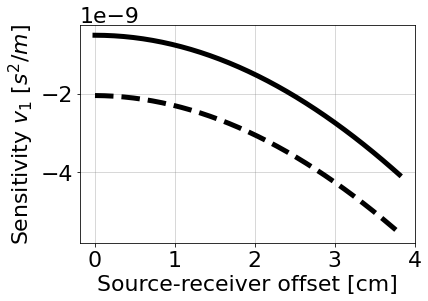

In [6]:
plt.plot((rx - rx[0])*100, der_v1, 'k',linewidth=5)
plt.plot((rx - rx[0])*100, der_v1_2, '--k',linewidth=5)

plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.3)
plt.xticks([0, 1, 2, 3, 4])
plt.xlabel('Source-receiver offset [cm]')
plt.ylabel(r'Sensitivity $v_1$ $[s^2/m]$')   

Text(0, 0.5, 'Sensitivity $v_2$ $[s^2/m]$')

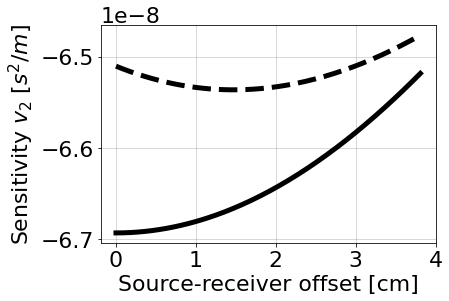

In [7]:
plt.plot((rx - rx[0])*100, der_v2, 'k',linewidth=5) 
plt.plot((rx - rx[0])*100, der_v2_2, '--k',linewidth=5) 

plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.3)
plt.xticks([0, 1, 2, 3, 4])
plt.xlabel('Source-receiver offset [cm]')
plt.ylabel(r'Sensitivity $v_2$ $[s^2/m]$')   

Text(0, 0.5, 'Sensitivity $\\varphi$ $[s]$')

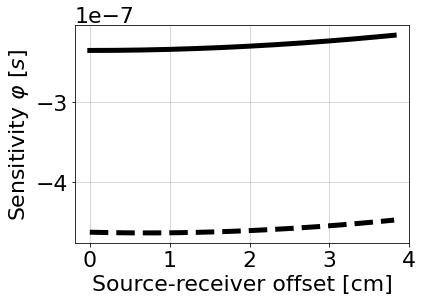

In [8]:
plt.plot((rx - rx[0])*100, der_phi, 'k',linewidth=5)  
plt.plot((rx - rx[0])*100, der_phi_2, '--k',linewidth=5) 

plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.3)
plt.xticks([0, 1, 2, 3, 4])
plt.xlabel('Source-receiver offset [cm]')
plt.ylabel(r'Sensitivity $\varphi$ $[s]$') 

Text(0, 0.5, 'Sensitivity $\\alpha$ $[s]$')

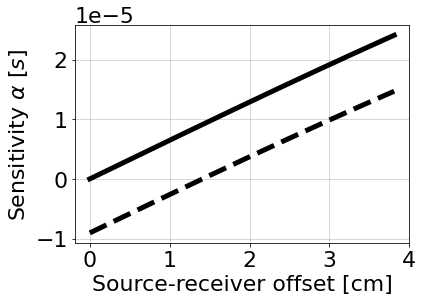

In [9]:
plt.plot((rx - rx[0])*100, der_alpha, 'k',linewidth=5)  
plt.plot((rx - rx[0])*100, der_alpha_2, '--k',linewidth=5)  

plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.3)
plt.xticks([0, 1, 2, 3, 4])
plt.xlabel('Source-receiver offset [cm]')
plt.ylabel(r'Sensitivity $\alpha$ $[s]$')   

#### Validate sensitivity calculation with derivatives computed via  finite-difference

Text(0, 0.5, 'Sensitivity $v_1$ $[s^2/m]$')

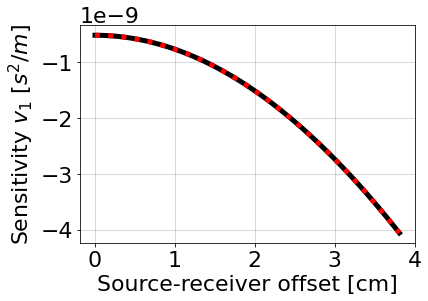

In [10]:
# Model parameters:

v_par = 1560                    # velocity along fibers
v_perp = 1540                   # velocity across fibers
phi = 5*np.pi/180               # anisotropy angle
alpha = 0*np.pi/180             # reflector inclination

m = np.array([v_par, v_perp, phi])

# Define small perturbation:

pert = 0.01

m2 = m + np.array([pert, 0, 0])

ttt_dif = traveltime(m2, alpha, L, rx, sou_ind) - traveltime(m, alpha, L, rx, sou_ind)

plt.plot((rx - rx[0])*100,ttt_dif/pert, 'k',linewidth=5)
plt.plot((rx - rx[0])*100,der_v1, ':r',linewidth=5) 

plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.3)
plt.xticks([0, 1, 2, 3, 4])
plt.xlabel('Source-receiver offset [cm]')
plt.ylabel(r'Sensitivity $v_1$ $[s^2/m]$')    